In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import ML_MJO_util as mjo 
import pickle

%load_ext autoreload 
%autoreload 2   

In [2]:
with open('/global/homes/l/linyaoly/ERA5/script/Unet4MJO/bcc_all.pkl', 'rb') as f:
    bcc_arrays = pickle.load(f)
with open('/global/homes/l/linyaoly/ERA5/script/Unet4MJO/rmse_all.pkl', 'rb') as f:
    rmse_arrays = pickle.load(f)

In [3]:
bcc_rmm_ref = bcc_arrays['bcc_rmm_1var'].mean(axis=0)
bcc_romi_ref = bcc_arrays['bcc_romi_1var'].mean(axis=0)
rmse_rmm_ref = rmse_arrays['rmse_rmm_1var'].mean(axis=0)
rmse_romi_ref = rmse_arrays['rmse_romi_1var'].mean(axis=0)

In [4]:
mjo_ind = 'RMM'
lead_list = [0,5,10,15,20,25,30]
exp_num_list = ['1','2','3','4','5','6','7','8','9','10']
bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_rmm = np.empty((len(lead_list), len(exp_num_list)))
rmse_list_rmm = np.empty((len(lead_list), len(exp_num_list)))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_rmm[i,j] = bcc[lead,exp_num]
        rmse_list_rmm[i,j] = rmse[lead,exp_num]

bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=10, mflg='all', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_rmm_e2 = np.empty((len(lead_list), len(exp_num_list)))
rmse_list_rmm_e2 = np.empty((len(lead_list), len(exp_num_list)))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_rmm_e2[i,j] = bcc[lead,exp_num]
        rmse_list_rmm_e2[i,j] = rmse[lead,exp_num]

bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=10, mflg='all', wnx=9, wnxflg='all', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_rmm_e3 = np.empty((len(lead_list), len(exp_num_list)))
rmse_list_rmm_e3 = np.empty((len(lead_list), len(exp_num_list)))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_rmm_e3[i,j] = bcc[lead,exp_num]
        rmse_list_rmm_e3[i,j] = rmse[lead,exp_num]

bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=10, mflg='resi', wnx=9, wnxflg='resi', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_rmm_e4 = np.empty((len(lead_list), len(exp_num_list)))
rmse_list_rmm_e4 = np.empty((len(lead_list), len(exp_num_list)))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_rmm_e4[i,j] = bcc[lead,exp_num]
        rmse_list_rmm_e4[i,j] = rmse[lead,exp_num]




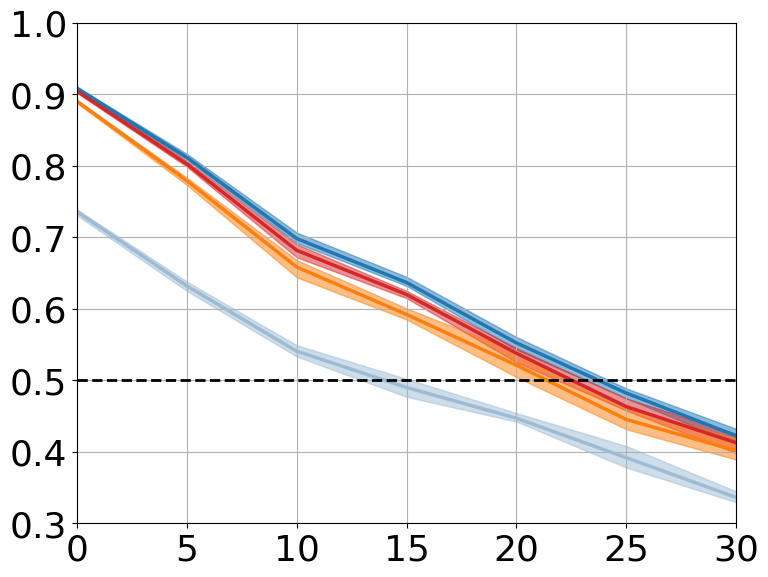

In [6]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm, axis=1).squeeze(), bcc_list_rmm, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e2, axis=1).squeeze(), bcc_list_rmm_e2, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:red',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e3, axis=1).squeeze(), bcc_list_rmm_e3, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:orange',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e4, axis=1).squeeze(), bcc_list_rmm_e4, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='#9dbcd4',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)


ax.plot([0,30],[0.5,0.5], 'k--', linewidth=2)

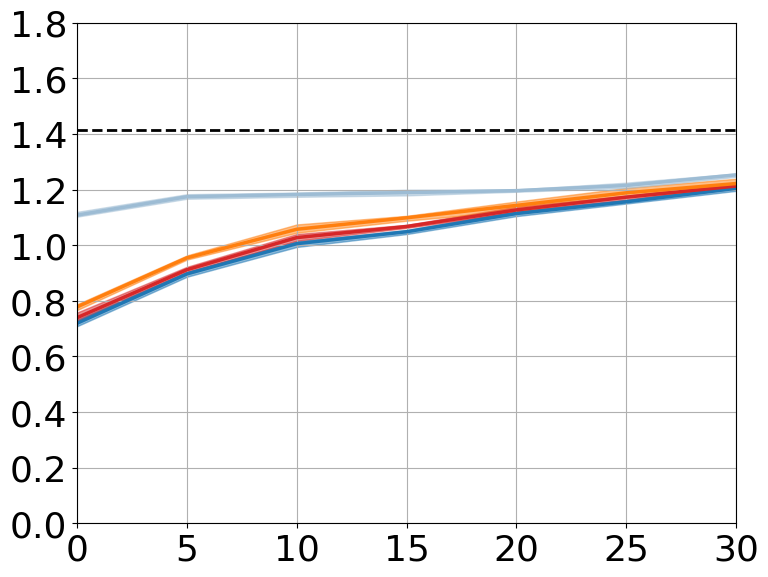

In [8]:
plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize=(8.5,6.5))
thred = np.sqrt(2)
ylim = [0.0,1.8]
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm, axis=1).squeeze(), rmse_list_rmm, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e2, axis=1).squeeze(), rmse_list_rmm_e2, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:red',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e3, axis=1).squeeze(), rmse_list_rmm_e3, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:orange',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e4, axis=1).squeeze(), rmse_list_rmm_e4, thred, xlab=None, ylab=None, label=None, title=None, line_c='#9dbcd4',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)

ax.plot([0,30],[thred,thred], 'k--', linewidth=2)

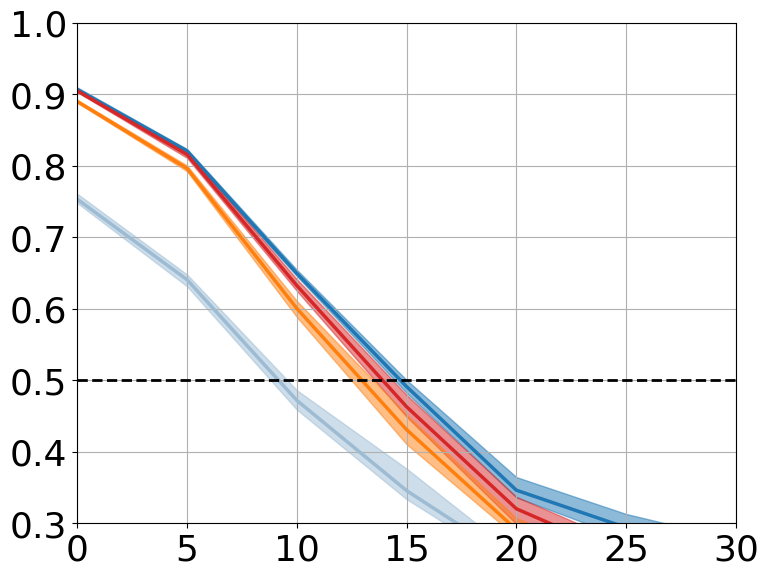

In [7]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm, axis=1).squeeze(), bcc_list_rmm, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e2, axis=1).squeeze(), bcc_list_rmm_e2, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:red',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e3, axis=1).squeeze(), bcc_list_rmm_e3, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:orange',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm_e4, axis=1).squeeze(), bcc_list_rmm_e4, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='#9dbcd4',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)


ax.plot([0,30],[0.5,0.5], 'k--', linewidth=2)


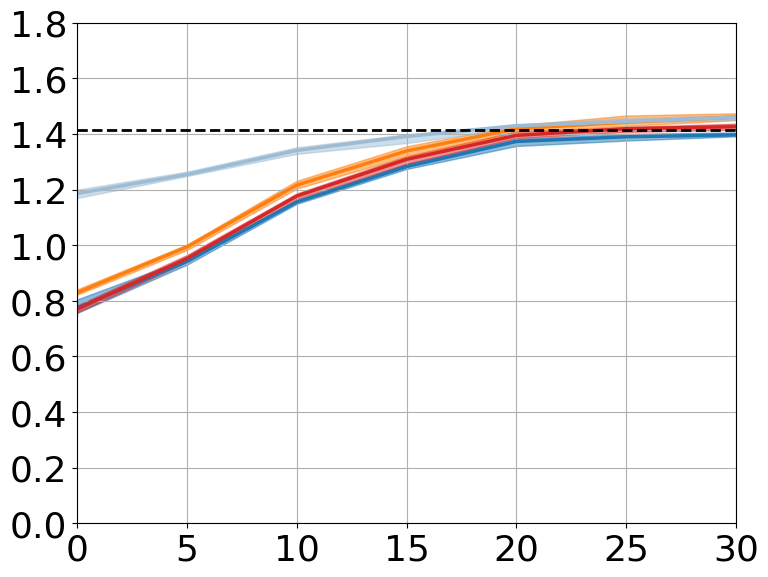

In [10]:
plt.rcParams.update({'font.size': 26})
fig, ax = plt.subplots(figsize=(8.5,6.5))
thred = np.sqrt(2)
ylim = [0.0,1.8]
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm, axis=1).squeeze(), rmse_list_rmm, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e2, axis=1).squeeze(), rmse_list_rmm_e2, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:red',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e3, axis=1).squeeze(), rmse_list_rmm_e3, thred, xlab=None, ylab=None, label=None, title=None, line_c='tab:orange',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)
mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm_e4, axis=1).squeeze(), rmse_list_rmm_e4, thred, xlab=None, ylab=None, label=None, title=None, line_c='#9dbcd4',alpha=1.0, xlim=[0,30], ylim=ylim, ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)

ax.plot([0,30],[thred,thred], 'k--', linewidth=2)

In [ ]:
mjo_ind = 'ROMI'
lead_list = [0,5,10,15,20,25,30]
bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_romi = np.empty((len(lead_list), len(exp_num_list)))
rmse_list_romi = np.empty((len(lead_list), len(exp_num_list)))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_romi[i,j] = bcc[lead,exp_num]
        rmse_list_romi[i,j] = rmse[lead,exp_num]

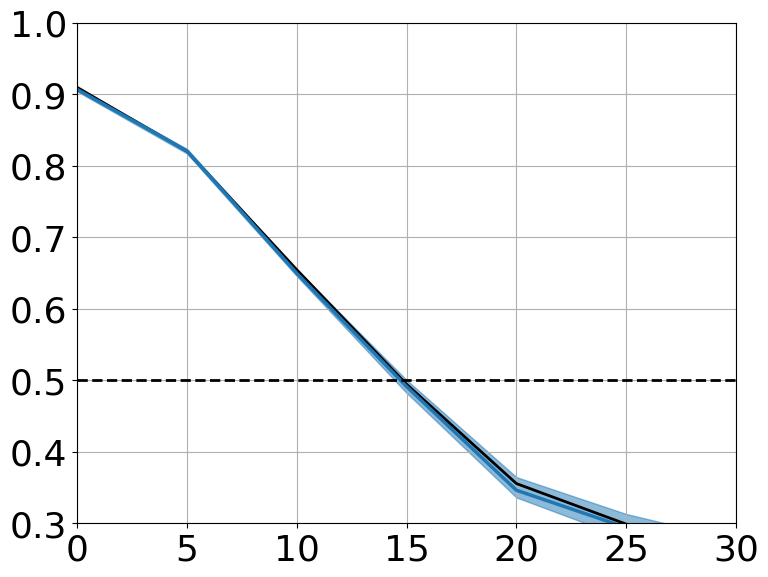

In [6]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

ax.plot(lead_list, bcc_rmm_ref, 'k', linewidth=2)
# ax.plot(lead_list, bcc_romi_ref, 'k', linewidth=2)

mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm, axis=1).squeeze(), bcc_list_rmm, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)

# mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_romi, axis=1).squeeze(), bcc_list_romi, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='orange',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)


ax.plot([0,30],[0.5,0.5], 'k--', linewidth=2)


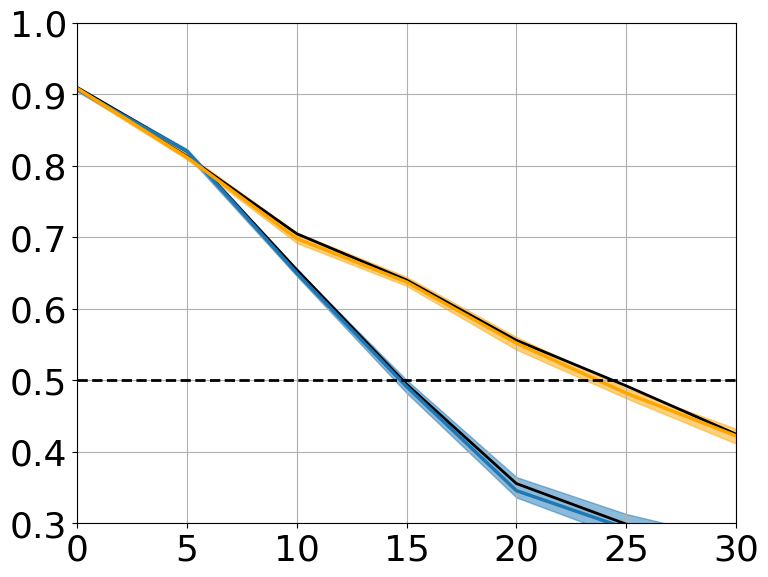

In [23]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

ax.plot(lead_list, bcc_rmm_ref, 'k', linewidth=2)
ax.plot(lead_list, bcc_romi_ref, 'k', linewidth=2)

mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_rmm, axis=1).squeeze(), bcc_list_rmm, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)

mjo.plot_uncertainty_all(ax, lead_list, np.mean(bcc_list_romi, axis=1).squeeze(), bcc_list_romi, 0.5, xlab=None, ylab=None, label=None, title=None, line_c='orange',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)


ax.plot([0,30],[0.5,0.5], 'k--', linewidth=2)


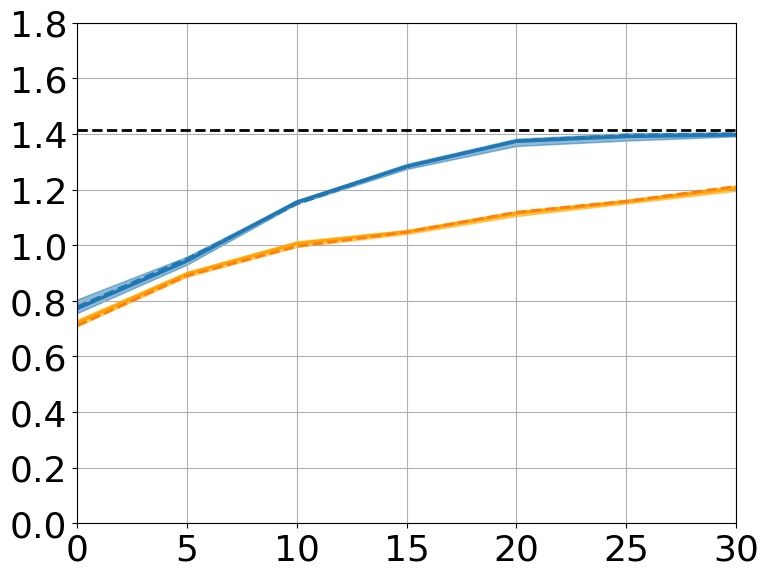

In [13]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_rmm, axis=1).squeeze(), rmse_list_rmm, np.sqrt(2), xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.0,1.8], ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)

mjo.plot_uncertainty_all(ax, lead_list, np.mean(rmse_list_romi, axis=1).squeeze(), rmse_list_romi, np.sqrt(2), xlab=None, ylab=None, label=None, title=None, line_c='orange',alpha=1.0, xlim=[0,30], ylim=[0.0,1.8], ftsize = 26, gap=0.2, style='-', alpha_fill=0.5)


ax.plot(lead_list, rmse_rmm_ref, color='tab:blue', linewidth=2, linestyle='--')
ax.plot(lead_list, rmse_romi_ref, color='tab:orange', linewidth=2, linestyle='--')

ax.plot([0,30],[np.sqrt(2), np.sqrt(2)], 'k--', linewidth=2)


In [ ]:
mjo_ind = 'RMM'
lead_list = [0,5,10,15,20,25,30]
exp_num_list = ['',] # ,'1','2','3','4','5','6','7','8','9','10']
bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_rmm = np.empty(len(lead_list), len(exp_num_list))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_rmm[i,j] = bcc[lead,exp_num]

mjo_ind = 'ROMI'
lead_list = [0,5,10,15,20,25,30]
bcc, rmse = mjo.get_1var_skill_parallel(mjo_ind, lead_list, exp_num_list=exp_num_list, m=1, mflg='off', wnx=1, wnxflg='off', rule='Iamp>1.0', vn='olr', dataflg='', winter=False, lat_range=20, output_dir='/pscratch/sd/l/linyaoly/ERA5/Unet4MJO/1map_MCDO_ERA5_shallow/output')
bcc_list_romi = np.empty(len(lead_list), len(exp_num_list))
for i, lead in enumerate(lead_list):
    for j, exp_num in enumerate(exp_num_list):
        bcc_list_romi[i,j] = bcc[lead,exp_num]

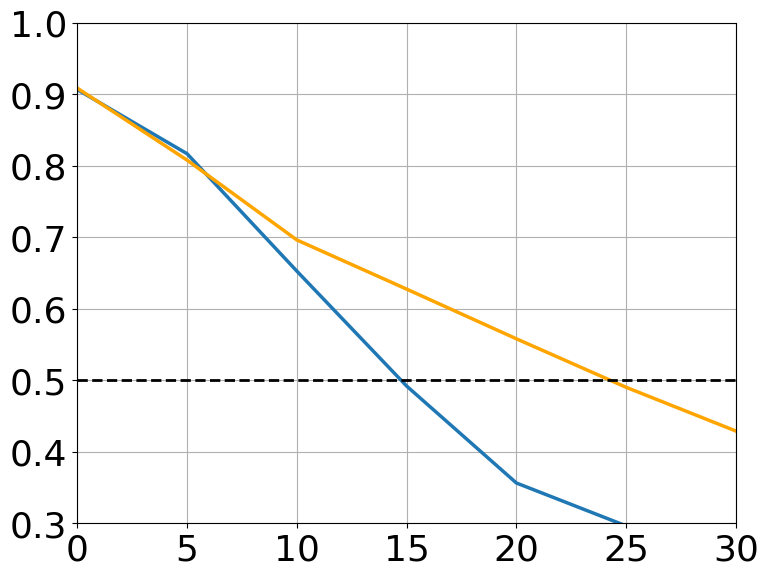

In [11]:
fig, ax = plt.subplots(figsize=(8.5,6.5))

plt.rcParams.update({'font.size': 26})

mjo.plot_uncertainty_all(ax, lead_list, bcc_list_rmm, np.reshape(bcc_list_rmm, (-1,1)), 0.5, xlab=None, ylab=None, label=None, title=None, line_c='tab:blue',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)

mjo.plot_uncertainty_all(ax, lead_list, bcc_list_romi, np.reshape(bcc_list_romi, (-1,1)), 0.5, xlab=None, ylab=None, label=None, title=None, line_c='orange',alpha=1.0, xlim=[0,30], ylim=[0.3,1.0], ftsize = 26, gap=0.1, style='-', alpha_fill=0.5)

ax.plot([0,30],[0.5,0.5], 'k--', linewidth=2)


In [6]:
bcc_list 

array([0.90638383, 0.81280564, 0.64840225, 0.49513338, 0.33383286,
       0.30460475])

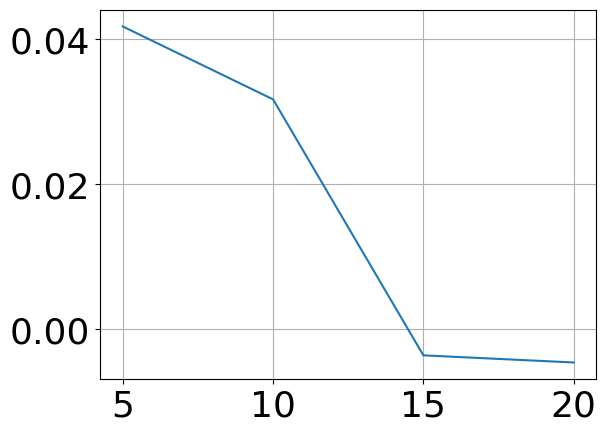

In [18]:
plt.plot(lead_list, bcc_list)
plt.grid(visible=True)